In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_column', 100)

In [4]:
mst_path = '../../datasets/mst/'
fig_path = '../../export/02_summary_stats_ped/'

In [5]:
df = pd.read_csv(mst_path + 'clean_ped.csv')
df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street
0,17560.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,4,7,0,1,2.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,11,0.0,0.0,0.0,0.0
1,17561.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0.0,0.0,0.0,0.0
2,17562.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,2,5,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,7,0.0,0.0,0.0,0.0
3,17563.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,1,3,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,4,0.0,0.0,0.0,0.0
4,17564.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,1,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0.0,0.0,0.0,0.0


# Identify problems with `date` and its distribution

Explore the data types of each column. Notice that the time column "date" is of type "object". Let's change that to datetime 

In [11]:
df['date'].dtype

dtype('O')

In [19]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes['date']

dtype('<M8[ns]')

In [25]:
# Observe that there are some nan values in the column date. We drop these rows
print("Number of nans in the date column:", df.isna().sum()['date'])
df = df.dropna(subset = ['date'])
df.index = range(len(df))
df.shape

Number of nans in the date column: 24


(2624, 35)

In [26]:
df.shape

(2624, 35)

In [27]:
# Explore the number of observations per year_month combinatino for the dataset
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: int(x.year))
df['yr_mo'] = [str(a)+'-'+str(b) for a,b in zip(df['year'], df['month'])]
df['yr_mo'].value_counts()

c:\users\lindsey tam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\lindsey tam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\lindsey tam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

2017-4     512
2017-6     280
2017-5     264
2016-4     240
2016-12    208
2016-5     208
2016-10    184
2017-1     144
2017-3     144
2017-2     128
2016-11    112
2016-9      56
2017-7      56
2018-1      32
2018-7      24
2016-8      24
2017-8       8
Name: yr_mo, dtype: int64

It seems that 2017-01 to 2017-06 has most of the data points, so we focus on this period only. Note that you can totally make other assumptions and subset the data in another way! This is just what I am doing here.

In [38]:
# Subset the data for only this time range:
time_range = ['2017-' + str(i) for i in range(1,7)]
print("time_range", time_range)

# Subset the data and check how many obs. are left
df = df[df['yr_mo'].isin(time_range)]
df.shape

time_range ['2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6']


(1472, 38)

# Temporal Trend of Total Counts

In order to explore any trends, we need to aggregate the data somehow. For example, assume we want to group by `date` and find the `sum` and `mean` of the variable `total_count` on each day, we could use the `groupby` and `agg` functions to achieve this.

Also try play around with 
```
grouped = df.groupby('date').agg(['sum', 'mean']).reset_index()
grouped.head()
```

In [39]:
df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street,month,year,yr_mo
32,16254.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:00 PM,2,4,0,0,1,0,1.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,6,0.0,0.0,0.0,0.0,1,2017,2017-1
33,16255.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:15 PM,2,3,0,0,0,2,2.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,5,0.0,0.0,0.0,0.0,1,2017,2017-1
34,16256.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:30 PM,0,1,0,0,0,0,1.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,1,0.0,0.0,0.0,0.0,1,2017,2017-1
35,16257.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:45 PM,1,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,1,0.0,0.0,0.0,0.0,1,2017,2017-1
36,16258.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,5:00 PM,1,1,0,0,1,0,0.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,2,0.0,0.0,0.0,0.0,1,2017,2017-1


In [40]:
len(df['date'].unique())

51

In [41]:
grouped = df.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
grouped.head()

,date,sum,mean
0,2017-01-10,16,1.0000
1,2017-01-15,53,3.3125
2,2017-01-17,51,3.1875
3,2017-01-24,161,10.0625
4,2017-01-26,90,11.2500


Let's try plotting the average total count per day. Note that this doesn't tell us anything useful, as we did not take into account the number of volunteers availabe!! Try deleting or adding back the last few functions (`plt.xticks`, `plt.xlabel`) and observe the difference. 

Text(0.5, 1.0, 'Average total_count by date')

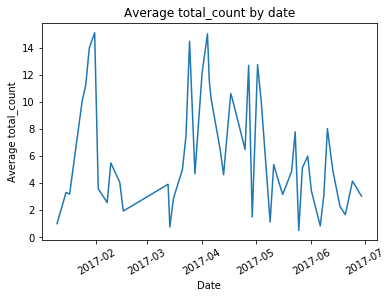

In [48]:
plt.plot(grouped['date'], grouped['mean'])
plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Average total_count')
plt.title("Average total_count by date")

Assume we only want to look at two cities, we could subset the datasets and do the same thing as above. Note that the below commands examines the two cities with most number of observations.

In [52]:
# Find which ciplt.xticks(rotation = 30)
# plt.xlabel('Date') ties has most number of observations
cities = df['city'].value_counts().sort_values(ascending = False)
cities.head()

Duarte                     168
Altadena                   144
Mt. SAC/Cal Poly/Walnut    128
Pomona                     104
Arcadia                     96
Name: city, dtype: int64

In [56]:
# Extract the two top cities:
top_cities = cities.index[:5]
top_cities

Index(['Duarte', 'Altadena'], dtype='object')

In [76]:
# We will proceed with Glendora and SEM
dua = df[df['city'] == 'Duarte']
alt = df[df['city'] == 'Altadena']
mts = df[df['city'] == 'Mt. SAC/Cal Poly/Walnut']
pom = df[df['city'] == 'Pomona']
arc = df[df['city'] == 'Arcadia']
print(dua.shape)
print(alt.shape)
print(mts.shape)
print(pom.shape)
print(arc.shape)

(168, 38)
(144, 38)
(128, 38)
(104, 38)
(96, 38)


In [82]:
# Perform the same groupby commands
dua_group = dua.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
alt_group = alt.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
mts_group = dua.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
pom_group = pom.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
arc_group = arc.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
dua_group
alt_group
mts_group
pom_group
arc_group


,date,sum,mean
0,2017-04-01,870,36.2500
1,2017-04-05,93,11.6250
2,2017-04-17,85,10.6250
3,2017-05-02,119,7.4375
4,2017-05-04,212,26.5000
5,2017-05-11,107,6.6875
6,2017-05-23,140,8.7500


Text(0.5, 1.0, 'Average total_count by date')

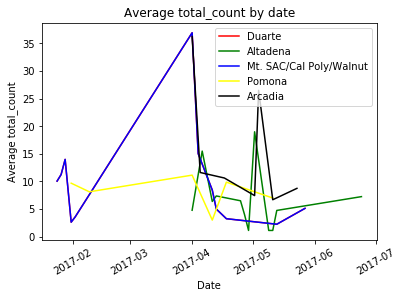

In [87]:
plt.plot(dua_group['date'], dua_group['mean'], color = 'red', label = 'Duarte')
plt.plot(alt_group['date'], alt_group['mean'], color = 'green', label = 'Altadena')
plt.plot(mts_group['date'], mts_group['mean'], color = 'blue', label = 'Mt. SAC/Cal Poly/Walnut')
plt.plot(pom_group['date'], pom_group['mean'], color = 'yellow', label = 'Pomona')
plt.plot(arc_group['date'], arc_group['mean'], color = 'black', label = 'Arcadia')
plt.xticks(rotation = 30)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average total_count')
plt.title("Average total_count by date")

In [81]:
# Perform the same groupby commands
gle_group = gle.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
sem_group = sem.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
gle_group
# sem_group

,date,sum,mean
0,2017-04-01,153,4.78125
1,2017-04-06,372,15.50000
2,2017-04-11,51,6.37500
3,2017-04-13,59,7.37500
4,2017-04-25,52,6.50000
5,2017-04-27,32,4.00000
6,2017-04-29,9,1.12500
7,2017-05-02,304,19.00000
8,2017-05-09,9,1.12500
9,2017-05-11,9,1.12500


Text(0.5, 1.0, 'Average total_count by date')

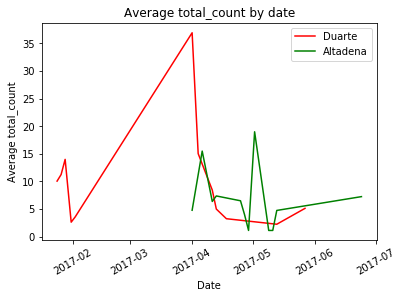

In [64]:
# Do the same time plot
plt.plot(gle_group['date'], gle_group['mean'], color = 'red', label = top_cities[0])
plt.plot(sem_group['date'], sem_group['mean'], color = 'green', label = top_cities[1])
plt.xticks(rotation = 30)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average total_count')
plt.title("Average total_count by date")

Gotta say this looks pretty bad... Now try select cities with most number of dates

In [65]:
city_ndate = df.groupby('city')['date'].nunique().sort_values(ascending = False)
city_ndate.head()

city
Altadena                   12
Duarte                     12
Mt. SAC/Cal Poly/Walnut     8
E. Pasadena                 7
Rowland Heights             7
Name: date, dtype: int64

Now you could perform the same analysis as above on these cities. I will not repeat that again.

# Temporal Trends of One Variable: Percentage of Female riders

In [67]:
# Create two time series - female and total
female = df.groupby('date').agg(['sum'])['female'].reset_index()
total = df.groupby('date').agg(['sum'])['total_count'].reset_index()
print(female.shape)
print(total.shape)

female.head()

(51, 2)
(51, 2)


,date,sum
0,2017-01-10,0.0
1,2017-01-15,0.0
2,2017-01-17,0.0
3,2017-01-24,0.0
4,2017-01-26,0.0


In [68]:
# We change the columns and merge these two datasets together
female.columns = ['date', 'female']
total.columns = ['date', 'total_count']
female.head()

,date,female
0,2017-01-10,0.0
1,2017-01-15,0.0
2,2017-01-17,0.0
3,2017-01-24,0.0
4,2017-01-26,0.0


In [71]:
merged = pd.merge(female, total, on = 'date', how = 'inner')
merged.shape

(51, 3)

In [72]:
merged.head()

,date,female,total_count
0,2017-01-10,0.0,16
1,2017-01-15,0.0,53
2,2017-01-17,0.0,51
3,2017-01-24,0.0,161
4,2017-01-26,0.0,90


In [73]:
# Explore female percentage changes - create a new column called female_perc
merged['female_perc'] = merged['female'] / merged['total_count']
merged.head()

,date,female,total_count,female_perc
0,2017-01-10,0.0,16,0.0
1,2017-01-15,0.0,53,0.0
2,2017-01-17,0.0,51,0.0
3,2017-01-24,0.0,161,0.0
4,2017-01-26,0.0,90,0.0


Text(0, 0.5, 'Female Percentage')

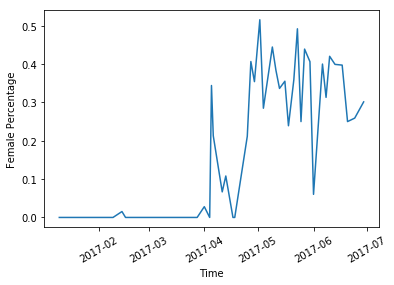

In [74]:
# Naive time plot 
plt.plot(merged['date'], merged['female_perc'])
plt.xticks(rotation = 30)
plt.xlabel('Time')
plt.ylabel('Female Percentage')

## Notice that the curve remained 0 for a long time, this is probably that the female data is not collected on this time period.

# Temporal Trends of One Variable: Day of Week

In [152]:
day_of_week = df.groupby('weekday').agg(['sum'])['total_count'].reset_index()
print(day_of_week.shape)
print(total.shape)

day_of_week.head()

(6, 2)
(51, 2)


,weekday,sum
0,Monday,179
1,Saturday,3911
2,Sunday,53
3,Thursday,2489
4,Tuesday,4037


In [161]:
day_of_week.columns = ['weekday', 'total_count']
day_of_week.head()

,weekday,total_count
0,Monday,179
1,Saturday,3911
2,Sunday,53
3,Thursday,2489
4,Tuesday,4037


In [158]:
total_riders = day_of_week['total_count'].sum()
total_riders

10762

In [162]:
day_of_week = day_of_week.reindex(columns=['weekday', 'total_count', 'weekday_perc'])
day_of_week[['weekday_perc']] = day_of_week['total_count'] / total_riders
day_of_week

,weekday,total_count,weekday_perc
0,Monday,179,0.016633
1,Saturday,3911,0.363408
2,Sunday,53,0.004925
3,Thursday,2489,0.231277
4,Tuesday,4037,0.375116
5,Wednesday,93,0.008642


Text(0, 0.5, 'Weekday Percentage')

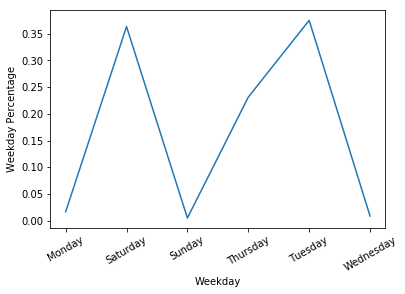

In [163]:
# Naive time plot 
plt.plot(day_of_week['weekday'], day_of_week['weekday_perc'])
plt.xticks(rotation = 30)
plt.xlabel('Weekday')
plt.ylabel('Weekday Percentage')